# Healthcare in Different States
In this project, we will use boxplots to investigate the way hospitals in different states across the United States charge their patients for medical procedures. The data originally came from the United State Health and Human Services Department.

Let’s use boxplots to find more meaning in this data!

In [1]:
#Import libraries 
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#Load data
healthcare = pd.read_csv("healthcare.csv")
print(healthcare.head())

                             DRG Definition  Provider Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   

                      Provider Name     Provider Street Address Provider City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider State  Provider Zip Code Hospital Referral Region Description  \
0             AL              36301                          AL - Dothan   


In [6]:
print(healthcare.dtypes)

DRG Definition                           object
Provider Id                               int64
Provider Name                            object
Provider Street Address                  object
Provider City                            object
Provider State                           object
Provider Zip Code                         int64
Hospital Referral Region Description     object
 Total Discharges                         int64
 Average Covered Charges                float64
 Average Total Payments                 float64
Average Medicare Payments               float64
dtype: object


## Investigating the Data
We’re going to focus on only the ways in which hospitals charge patients for chest pain. But we could do this for any of the diagnoses in our dataset. Let's print healthcare["DRG Definition"].unique() to see all of the different diagnoses in our dataset.

Can we find the official name of the diagnosis related to chest pain?

In [7]:
print(healthcare["DRG Definition"].unique())

['039 - EXTRACRANIAL PROCEDURES W/O CC/MCC'
 '057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC'
 '069 - TRANSIENT ISCHEMIA'
 '064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC'
 '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC'
 '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC'
 '074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC'
 '101 - SEIZURES W/O MCC' '149 - DYSEQUILIBRIUM'
 '176 - PULMONARY EMBOLISM W/O MCC'
 '177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC'
 '189 - PULMONARY EDEMA & RESPIRATORY FAILURE'
 '178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC'
 '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC'
 '191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC'
 '193 - SIMPLE PNEUMONIA & PLEURISY W MCC'
 '194 - SIMPLE PNEUMONIA & PLEURISY W CC'
 '192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O CC/MCC'
 '195 - SIMPLE PNEUMONIA & PLEURISY W/O CC/MCC'
 '202 - BRONCHITIS & ASTHMA W CC/MCC'
 '203 - BRONCHITIS & ASTHMA W/O CC/MCC'
 '207 - RESPIRAT

As we've seen, there are plenty of procedures to look forward to in our investigation, but right now the one we are interested in is '313 - CHEST PAIN' so let's aislate it to a variable. 

In [8]:
chest_pain = healthcare[healthcare['DRG Definition'] == '313 - CHEST PAIN']

## Separating by State 
We now want to separate the dataset by state. Eventually, we’ll use a for loop to do this for every state, but for now, let’s prove to ourselves that we can make a boxplot for one state. We'll be using the state of New York for this example. 

In [9]:
new_york_chest_pain = chest_pain[chest_pain['Provider State'] == 'NY']

We now have all of the hospitals in New York that have diagnosed chest pain. We now want to find the average cost of those diagnoses. These values are stored in the column ' Average Covered Charges '. 

In [10]:
costs = new_york_chest_pain[' Average Covered Charges '].values

Let's now make the box plot for this particular state

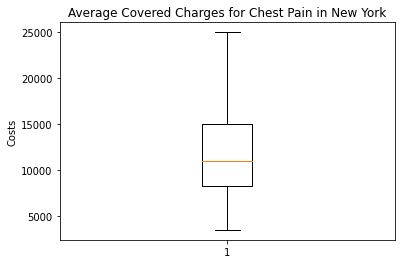

In [12]:
plt.boxplot(costs)
plt.title('Average Covered Charges for Chest Pain in New York')
plt.ylabel('Costs')
plt.show()

## Making Boxplots for every State 

Nice work! We’ve made a boxplot for one state. But how does that state compare to the others? Let’s make a boxplot for every state! 

To begin, we first need to create a list of all the states in our dataset. We can once again use the unique() function. We used this function when we looked at all of the diagnoses.

Let's find all of the unique states from the dataset chest_pain and store them in a variable named states.

In [13]:
states = chest_pain['Provider State'].unique()
print(states)

['MA' 'AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID'
 'IL' 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']



We’ll now use a for loop to separate the dataset into a dataset for each state

In [15]:
datasets = []
for state in states:
  datasets.append(chest_pain[chest_pain['Provider State'] == state][' Average Covered Charges '].values)
#print(datasets)

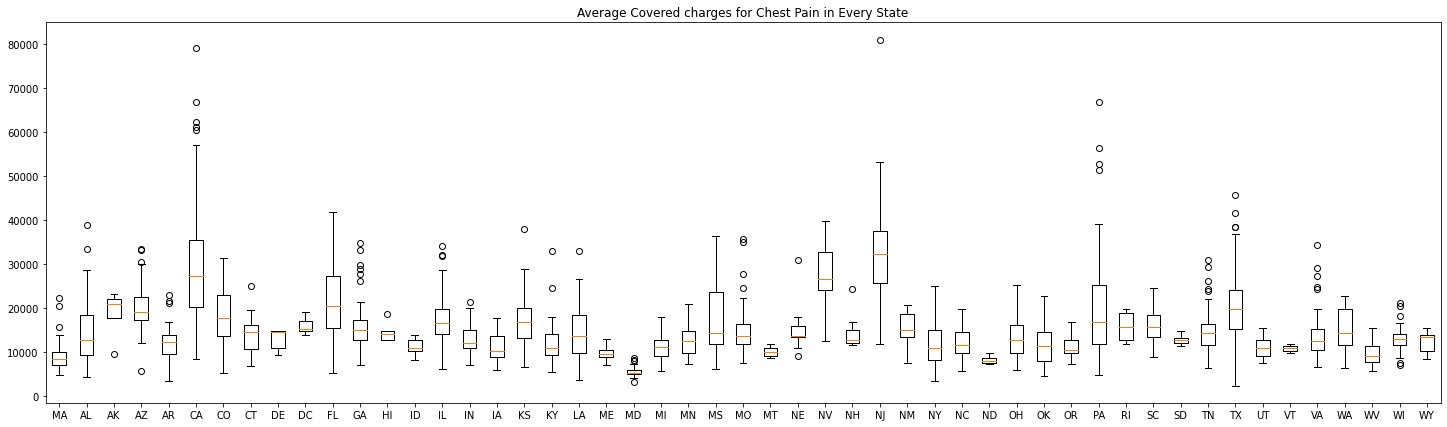

In [30]:
plt.clf()
plt.figure(figsize=(25,7))
plt.boxplot(datasets, labels= states)
plt.title('Average Covered charges for Chest Pain in Every State')
plt.show()

## Part 2: analizing boxplots for Alcohol and Drug Abuse 

We'll be using everything learned until now to develop a similar boxplot of all states and the total discharges for people with alcohol or drug abuse who need rehabilitation.  

In [21]:
alcohol_drug_abuse = healthcare[healthcare['DRG Definition'] ==  '897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC']
print(alcohol_drug_abuse)

                                           DRG Definition  Provider Id  \
158141  897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...        10001   
158142  897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...        10006   
158143  897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...        10009   
158144  897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...        10023   
158145  897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...        10029   
...                                                   ...          ...   
159050  897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...       520113   
159051  897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...       520138   
159052  897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...       520139   
159053  897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...       520177   
159054  897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...       530014   

                              Provider Name    Provider Street Address  \
158141     SOUTHEAST ALABAMA MEDICAL 

In [22]:
states_abuse = alcohol_drug_abuse['Provider State'].unique()
print(states_abuse)

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'MA' 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']


In [24]:
datasets_abuse = []
for state in states_abuse:
  datasets_abuse.append(alcohol_drug_abuse[alcohol_drug_abuse['Provider State'] == state][' Total Discharges '].values)
print(datasets_abuse)

[array([ 47,  14,  42,  14,  14,  15,  38,  13,  11,  34, 276,  22,  24,
        92,  13, 201]), array([12, 13]), array([11, 23, 14, 12, 15, 12, 13]), array([13, 18, 36, 52, 32, 36, 12, 25]), array([ 99,  48,  17,  31,  12,  16,  13,  24,  24,  53,  14,  11,  17,
        11,  26,  12,  15,  19,  11,  13,  12,  33,  13,  17,  29,  11,
        11,  12,  20,  14,  11,  14,  23,  11,  18,  32,  15,  12,  18,
        11,  13,  12, 134,  15,  44,  22,  15,  13,  15,  13,  11,  84,
        14,  14,  93,  24,  11,  28,  17,  14, 117, 510]), array([14, 14, 21, 19, 11, 22, 18, 26, 43]), array([27, 39, 13, 21, 18, 13, 12, 26, 66, 21, 57, 13, 19, 24, 12, 28, 22,
       53, 15]), array([52, 21]), array([13, 17, 33, 17]), array([ 32,  26,  96,  31,  13,  80,  42,  25,  11,  11,  13,  13,  13,
        19,  42,  15,  12,  12,  12,  14,  11,  33,  20,  14,  18,  11,
        21,  13,  29,  12,  20,  45,  46,  20,  60,  19,  65,  32,  16,
        22,  11,  15,  15,  34,  15,  58,  16,  17,  13,  12,  12,

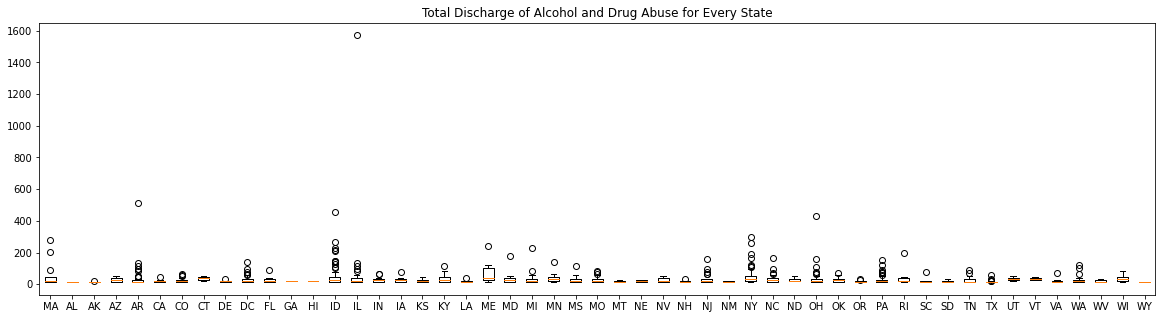

In [31]:
plt.clf()
plt.figure(figsize=(20,5))
plt.boxplot(datasets_abuse, labels= states)
plt.title('Total Discharge of Alcohol and Drug Abuse for Every State')
plt.show()

**Results:** In this visualization, the box plots become very small because there is an outlier in the state of Illinois that has an extreme case of total discharges arousing between the 1500 and 1600 . This is considered a serious and extreme case to be look forward to. 